In [3]:
%%javascript 
IPython.OutputArea.prototype._should_scroll = function(lines) {    return false;   }

<IPython.core.display.Javascript object>

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools as it
import PIL
import skimage.morphology as skm
from graph2 import Graph
from IPython.display import display
#https://github.com/fhirschmann/rdp
from rdp import rdp

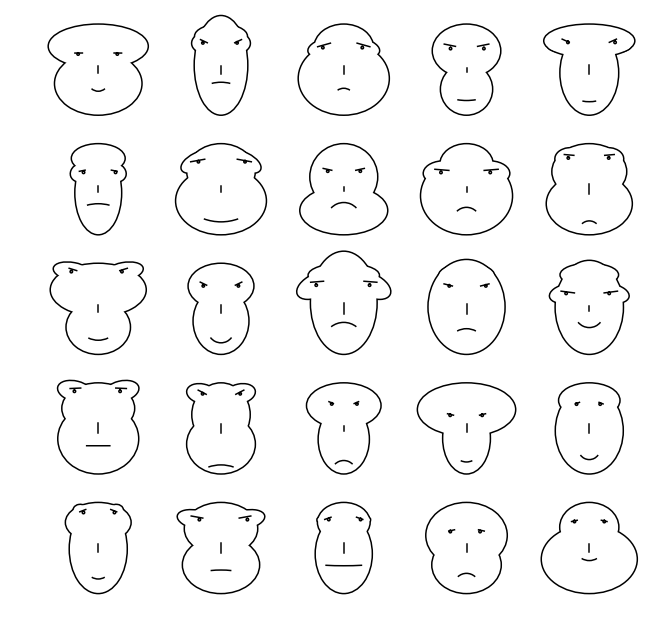

In [123]:
# Chernoff faces
# code based on https://gist.github.com/aflaxman/4043086 with minor modifications

def cface(ax, x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,forImageParse=False):
    # x1 = height  of upper face
    # x2 = overlap of lower face
    # x3 = half of vertical size of face
    # x4 = width of upper face
    # x5 = width of lower face
    # x6 = length of nose
    # x7 = vertical position of mouth
    # x8 = curvature of mouth
    # x9 = width of mouth
    # x10 = vertical position of eyes
    # x11 = separation of eyes
    # x12 = slant of eyes
    # x13 = eccentricity of eyes
    # x14 = size of eyes
    # x15 = position of pupils
    # x16 = vertical position of eyebrows
    # x17 = slant of eyebrows
    # x18 = size of eyebrows
    
    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9*(x3-.5)
    x4 = (x4+.25)
    x5 = (x5+.2)
    x6 = .3*(x6+.01)
    x8 = 5*(2*(x8-0.5))
    if abs(x8)<0.005:  # Allow frowns, they are cute
        x8=0.005
    x11 /= 5
    x12 = 2*(x12-.5)
    x13 += .05
    x14 += .1
    x15 = .5*(x15-.5)
    x16 = .25*x16
    x17 = .5*(x17-.5)
    x18 = .5*(x18+.1)
    if forImageParse:
        lw=1
    else:
        lw=3
    pupilsize=0.075
    
    drawcolor='black'
    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = mpl.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', linewidth=lw, ec=drawcolor)
    ax.add_artist(e)

    if forImageParse:
        drawcolor='red'
    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = mpl.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', linewidth=lw, ec=drawcolor)
    ax.add_artist(e)
 
    # draw eyes
    if forImageParse:
        drawcolor='blue'

    p = mpl.patches.Ellipse( (-x11-x14/2,x10), x14, x13*x14, angle=-180/np.pi*x12, 
                            facecolor='white', linewidth=lw, ec=drawcolor)
    ax.add_artist(p)
    
    p = mpl.patches.Ellipse( (x11+x14/2,x10), x14, x13*x14, angle=180/np.pi*x12, 
                            facecolor='white', linewidth=lw, ec=drawcolor)
    ax.add_artist(p)

    # cover overlaps
    # top of face
    e = mpl.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', ec='none')
    ax.add_artist(e)
    # bottom of face
    e = mpl.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', ec='none')
    ax.add_artist(e)
    # eyes
    p = mpl.patches.Ellipse( (-x11-x14/2,x10), x14, x13*x14, angle=-180/np.pi*x12, facecolor='white', ec='none')
    ax.add_artist(p)
    
    p = mpl.patches.Ellipse( (x11+x14/2,x10), x14, x13*x14, angle=180/np.pi*x12, facecolor='white', ec='none')
    ax.add_artist(p)
    
    
    #f=plt.figure()
    #innerax=f.add_subplot(1,1,1,aspect=equal)
    
    # draw mouth
    if forImageParse:
        drawcolor='black'
    else:
        lw=lw/2.0 # half is covered by the edgecolor above, apparently
    p = mpl.patches.Arc( (0,-x7+.5/x8), 1/x8, 1/x8, 
                        theta1=270-180/np.pi*np.arctan(abs(x8)*x9), 
                        theta2=270+180/np.pi*np.arctan(abs(x8)*x9), linewidth=lw )
    #innerax.add_artist(p)
    #innerax.axis([-1.2,1.2,-1.2,1.2])
    #innerax.axis("off")
    # draw the renderer
    #f.canvas.draw ( )
    ax.add_artist(p)
    
    if not forImageParse:
        # draw nose
        plt.plot([0,0], [-x6/2, x6/2], 'k',linewidth=lw)
        # Get the RGBA buffer from the figure
        #w,h = fig.canvas.get_width_height()
        #buf = np.frombuffer ( f.canvas.tostring_argb(), dtype=np.uint8 )
        #buf.shape = ( w, h,4 )

        # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
        #buf = np.roll ( buf, 3, axis = 2 )
        #return buf


        # draw pupils
        angles=np.linspace(0,2*np.pi,20)
        xs=[-x11-x14/2-x15*x14/2+pupilsize/3.0*np.sin(theta) for theta in angles]
        ys=[x10+pupilsize/3.0*np.cos(theta) for theta in angles]
        plt.plot(xs,ys,'k',linewidth=lw)
        xs=[x11+x14/2-x15*x14/2+pupilsize/3.0*np.sin(theta) for theta in angles]
        plt.plot(xs,ys,'k',linewidth=lw)
        #p = mpl.patches.Ellipse( (-x11-x14/2-x15*x14/2, x10), pupilsize, pupilsize, facecolor='black')
        #ax.add_artist(p)
        #p = mpl.patches.Ellipse( (x11+x14/2-x15*x14/2, x10), pupilsize, pupilsize, facecolor='black')
        #ax.add_artist(p)

        # draw eyebrows
        plt.plot([-x11-x14/2-x14*x18/2,-x11-x14/2+x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k',linewidth=lw)
        plt.plot([x11+x14/2+x14*x18/2,x11+x14/2-x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k', linewidth=lw)

fig = plt.figure(figsize=(11,11))
for i in range(25):
    ax = fig.add_subplot(5,5,i+1,aspect='equal')
    cface(ax, .9, *(np.random.rand(17)*0.5+0.25))
    ax.axis([-1.2,1.2,-1.2,1.2])
    plt.axis("off")

fig.subplots_adjust(hspace=0, wspace=0)

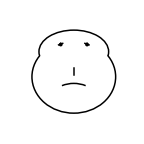

In [124]:
# based on http://www.icare.univ-lille1.fr/tutorials/convert_a_matplotlib_figure
# generate an image from the plot
def fig2data ( fig ):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.frombuffer ( fig.canvas.tostring_argb(), dtype=np.uint8 )
    buf.shape = ( w, h,4 )
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = np.roll ( buf, 3, axis = 2 )
    return buf

def make_face(params):
    fig=plt.figure(figsize=(2,2))
    ax=plt.gca()
    cface(ax,.9,*(params))
    _=ax.axis([-1.2,1.2,-1.2,1.2])
    _=plt.axis("off")

    Z=fig2data(fig)/255.0
    plt.close(fig)

    Z=1.0-(np.multiply(Z[:,:,0],Z[:,:,3])+(1.0 - Z[:,:,3]))
    return Z.ravel()
def toImage(inImg):
    return np.uint8(np.clip((1.0-inImg.reshape(144,144))*255,0,255))
def toPILImage(inImg):
    return PIL.Image.frombuffer("L",inImg.shape,inImg,"raw","L",0,1)

p=np.random.rand(17)*0.5+0.25
q=make_face(p)
display(toPILImage(toImage(q)))

(array([369. , 361.8]), array([601.5, 588.3]))


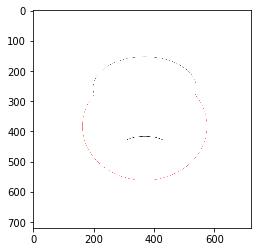

In [125]:
#p=np.random.rand(17)*0.5+0.25
fig=plt.figure(figsize=(10,10))
ax=plt.gca()
cface(ax,.9,*(p), True)
_=ax.axis([-1.2,1.2,-1.2,1.2])
_=plt.axis("off")

Z=fig2data(fig)/255.0
transinfo=(ax.transData.transform((0,0)),ax.transData.transform((1,1)))

plt.close(fig)

plt.imshow(Z)
print(transinfo)


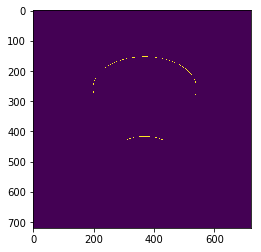

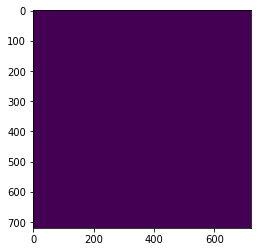

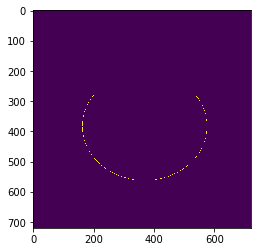

2
0
1
[[[0.3452538631346577, 0.3894039735099336, 0.48653421633554067, 0.5350993377483442, 0.645474613686534, 0.7293598233995583, 0.8088300220750549, 0.8573951434878585, 0.8883002207505516, 0.9015452538631343, 0.8971302428256068, 0.8662251655629136, 0.8088300220750549, 0.742604856512141, 0.6366445916114788, 0.5571743929359821, 0.4777041942604855, 0.3938189845474612, 0.3452538631346577], [-0.7225806451612903, -0.7354838709677419, -0.7354838709677419, -0.7225806451612903, -0.6623655913978495, -0.5763440860215053, -0.44731182795698926, -0.31827956989247314, -0.18064516129032257, -0.03870967741935484, 0.10752688172043011, 0.27956989247311825, 0.443010752688172, 0.5548387096774193, 0.6623655913978495, 0.7096774193548387, 0.7311827956989247, 0.7311827956989247, 0.7182795698924731]], 'k-']


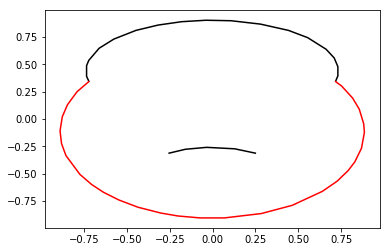

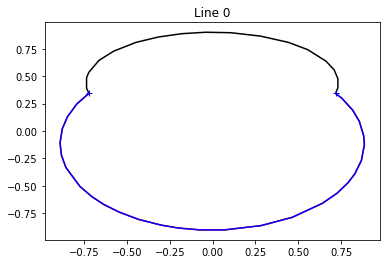

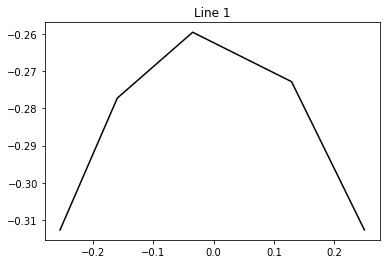

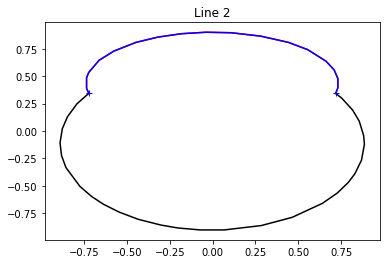

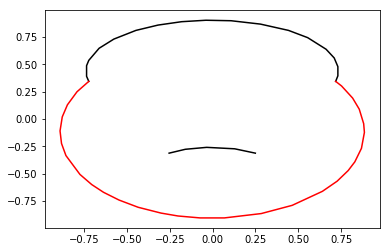

In [145]:
def make_lines(im):
        nodes=[]
        edges=[]
        skel=skm.medial_axis(im)
        
        idx=np.ones_like(skel,dtype=np.int32)*-1
        for i,j in  it.product(range(skel.shape[0]), range(skel.shape[1])):
            if skel[i,j]>0:
                idx[i,j]=len(nodes)
                nodes.append( (i,j) )
                # im sure to already have covered all the j's for i-1
                if j>0 and idx[i,j-1]>=0:
                    edges.append( (idx[i,j-1],idx[i,j]) )
                if i>0:
                    if j>0 and idx[i-1,j-1]>=0:
                       edges.append( (idx[i-1,j-1],idx[i,j]) )
                    if idx[i-1,j]>=0:
                       edges.append( (idx[i-1,j],idx[i,j]) )
                    if j<skel.shape[1]-1 and idx[i-1,j+1]>=0:
                       edges.append( (idx[i-1,j+1],idx[i,j]) )
        
        g=Graph(nodes,edges)
        g.remove_3cycles()
        g.remove_pseudonodes()
        return [list(g.get_polyline(e)) for e in g.edges ]



black_pixels=np.logical_and(Z[:,:,2]<0.7,Z[:,:,0]<0.7)
red_pixels=np.logical_and(Z[:,:,0]>0.5,Z[:,:,2]<0.5)
blue_pixels=np.logical_and(Z[:,:,2]>0.5,Z[:,:,0]<0.5)
plt.imshow(black_pixels)
plt.show()
plt.imshow(blue_pixels)
plt.show()
plt.imshow(red_pixels)
plt.show()

black_lines=make_lines(black_pixels)
red_lines=make_lines(red_pixels)
blue_lines=make_lines(blue_pixels)
print(len(black_lines))
print(len(blue_lines))
print(len(red_lines))

def transformline(l):
    return ( (Z.shape[1]-1-np.array(l[0])-transinfo[0][1])/(transinfo[1][1]-transinfo[0][1]),
             (np.array(l[1])-transinfo[0][0])/(transinfo[1][0]-transinfo[0][0]) )

linesraw=[(transformline(l),'k-') for l in black_lines] + [(transformline(l),'b-') for l in blue_lines] + [(transformline(l),'r-') for l in red_lines]

#print(linesraw)
#print(linesraw[0][0])
#print(list(zip(linesraw[0][0][0],linesraw[0][0][1])))
#print(rdp(list(zip(linesraw[0][0][0],linesraw[0][0][1]))))
#lines=[( zip(*rdp(zip(l[0],l[1]))),c) for l,c in linesraw]
lines=[[ list(map(list,list(zip(*rdp(list(zip(l[0],l[1])),epsilon=1.5/(transinfo[1][1]-transinfo[0][1])))))),c] for l,c in linesraw]
print(lines[0])
def linedist(i,i_idx,j,j_idx):
    dx=lines[i][0][0][i_idx]-lines[j][0][0][j_idx]
    dy=lines[i][0][1][i_idx]-lines[j][0][1][j_idx]
    return np.sqrt(dx*dx+dy*dy)
distances=np.ones((len(lines)*2,len(lines)*2))*9999999.9
for i in range(len(lines)):
    for j in range(i+1, len(lines)):
        distances[i*2,j*2]=linedist(i,0,j,0)
        distances[i*2,j*2+1]=linedist(i,0,j,-1)
        distances[i*2+1,j*2]=linedist(i,-1,j,0)
        distances[i*2+1,j*2+1]=linedist(i,-1,j,-1)
        distances[j*2,i*2]=distances[i*2,j*2]
        distances[j*2+1,i*2]=distances[i*2,j*2+1]
        distances[j*2,i*2+1]=distances[i*2+1,j*2]
        distances[j*2+1,i*2+1]=distances[i*2+1,j*2+1]
for l,c in lines:
    plt.plot(l[1],l[0],c)
#plt.gca().invert_yaxis()
plt.show()

isDone=[False]*len(lines)*2
for i in range(len(lines)):
    plt.plot(lines[i][0][1],lines[i][0][0],'k')
    for e in [0,1]:
        if not isDone[i*2+e]:
            m=np.argmin(distances[i*2+e,:])
            if distances[i*2+e,m]<3/(transinfo[1][0]-transinfo[0][0]):
                j=int(m/2)
                j_idx=-1*(m%2)
                cx=(lines[i][0][0][-1*e]+lines[j][0][0][j_idx])/2.0
                cy=(lines[i][0][1][-1*e]+lines[j][0][1][j_idx])/2.0
                plt.plot(lines[j][0][1],lines[j][0][0],'b' if e>0 else 'r')
                plt.plot([cy],[cx],'b+')
                lines[i][0][0][-1*e]=cx
                lines[j][0][0][j_idx]=cx
                lines[i][0][1][-1*e]=cy
                lines[j][0][1][j_idx]=cy
                
    #plt.gca().invert_yaxis()
    plt.title("Line %d"%(i))
    plt.show()
    
for l,c in lines:
    plt.plot(l[1],l[0],c)
#plt.gca().invert_yaxis()
plt.show()


w,h,648,648
[81. 81.]
[583.2  570.24]


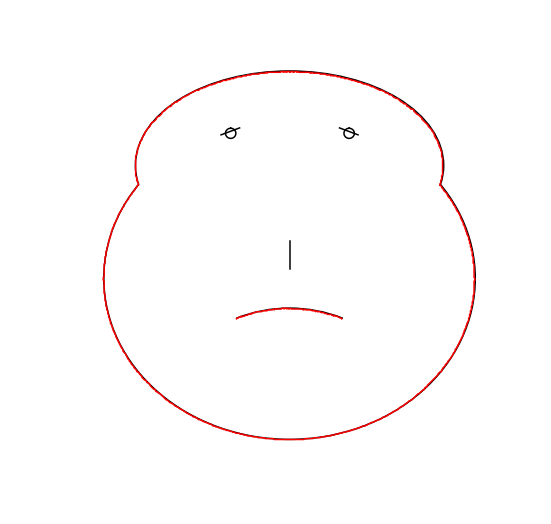

In [127]:
fig=plt.figure(figsize=(9,9))
ax=plt.gca()
cface(ax,.9,*(p))
_=ax.axis([-1.2,1.2,-1.2,1.2])
_=plt.axis("off")
w,h = fig.canvas.get_width_height()
print("w,h,%d,%d"%(w,h))
print(ax.transData.transform((-1.2,-1.2)))
print(ax.transData.transform((1.2,1.2)))
for l,c in lines:
    plt.plot(l[1],l[0],'r-')
plt.show()



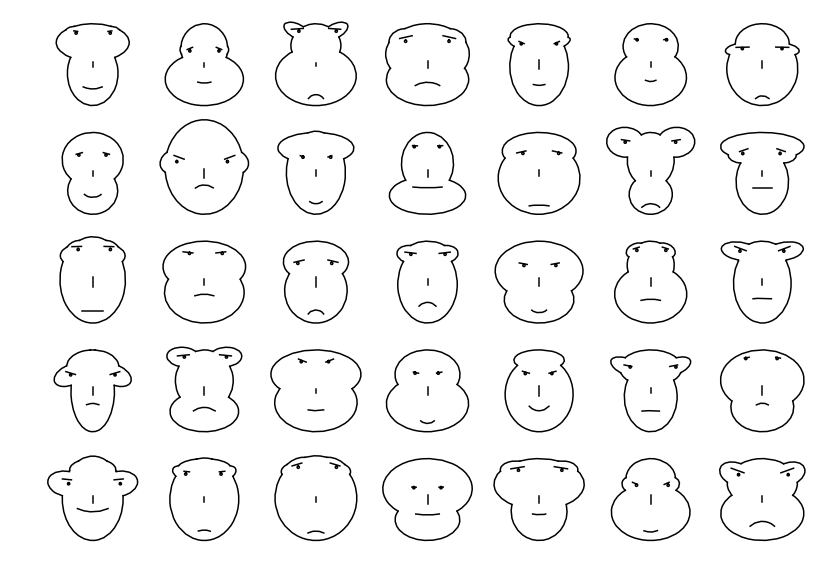

In [155]:
def face_as_lines(p):
    fig=plt.figure(figsize=(10,10))
    ax=plt.gca()
    cface(ax,.9,*(p), True)
    _=ax.axis([-1.2,1.2,-1.2,1.2])
    _=plt.axis("off")

    Z=fig2data(fig)/255.0
    transinfo=(ax.transData.transform((0,0)),ax.transData.transform((1,1)))

    plt.close(fig)

    black_pixels=np.logical_and(Z[:,:,2]<0.7,Z[:,:,0]<0.7)
    red_pixels=np.logical_and(Z[:,:,0]>0.5,Z[:,:,2]<0.5)
    blue_pixels=np.logical_and(Z[:,:,2]>0.5,Z[:,:,0]<0.5)

    black_lines=make_lines(black_pixels)
    red_lines=make_lines(red_pixels)
    blue_lines=make_lines(blue_pixels)

    def transformline(l):
        return ( (np.array(l[1])-transinfo[0][0])/(transinfo[1][0]-transinfo[0][0]),
               (Z.shape[1]-1-np.array(l[0])-transinfo[0][1])/(transinfo[1][1]-transinfo[0][1]))

    linesraw=[transformline(l) for l in black_lines] + [transformline(l) for l in blue_lines] + [transformline(l) for l in red_lines]

    lines=[ list(map(list,list(zip(*rdp(list(zip(l[0],l[1])),epsilon=1.5/(transinfo[1][1]-transinfo[0][1])))))) for l in linesraw]
    def linedist(i,i_idx,j,j_idx):
        dx=lines[i][0][i_idx]-lines[j][0][j_idx]
        dy=lines[i][1][i_idx]-lines[j][1][j_idx]
        return np.sqrt(dx*dx+dy*dy)
    distances=np.ones((len(lines)*2,len(lines)*2))*9999999.9
    for i in range(len(lines)):
        for j in range(i+1, len(lines)):
            distances[i*2,j*2]=linedist(i,0,j,0)
            distances[i*2,j*2+1]=linedist(i,0,j,-1)
            distances[i*2+1,j*2]=linedist(i,-1,j,0)
            distances[i*2+1,j*2+1]=linedist(i,-1,j,-1)
            distances[j*2,i*2]=distances[i*2,j*2]
            distances[j*2+1,i*2]=distances[i*2,j*2+1]
            distances[j*2,i*2+1]=distances[i*2+1,j*2]
            distances[j*2+1,i*2+1]=distances[i*2+1,j*2+1]

    isDone=[False]*len(lines)*2
    for i in range(len(lines)):
        for e in [0,1]:
            if not isDone[i*2+e]:
                m=np.argmin(distances[i*2+e,:])
                if distances[i*2+e,m]<3/(transinfo[1][0]-transinfo[0][0]):
                    j=int(m/2)
                    j_idx=-1*(m%2)
                    cx=(lines[i][0][-1*e]+lines[j][0][j_idx])/2.0
                    cy=(lines[i][1][-1*e]+lines[j][1][j_idx])/2.0
                    lines[i][0][-1*e]=cx
                    lines[j][0][j_idx]=cx
                    lines[i][1][-1*e]=cy
                    lines[j][1][j_idx]=cy
    # last bits of cfaces
    def cfaceplots(ax, x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18):
        lines=[]
        # x1 = height  of upper face
        # x2 = overlap of lower face
        # x3 = half of vertical size of face
        # x4 = width of upper face
        # x5 = width of lower face
        # x6 = length of nose
        # x7 = vertical position of mouth
        # x8 = curvature of mouth
        # x9 = width of mouth
        # x10 = vertical position of eyes
        # x11 = separation of eyes
        # x12 = slant of eyes
        # x13 = eccentricity of eyes
        # x14 = size of eyes
        # x15 = position of pupils
        # x16 = vertical position of eyebrows
        # x17 = slant of eyebrows
        # x18 = size of eyebrows

        # transform some values so that input between 0,1 yields variety of output
        x3 = 1.9*(x3-.5)
        x4 = (x4+.25)
        x5 = (x5+.2)
        x6 = .3*(x6+.01)
        x8 = 5*(2*(x8-0.5))
        if abs(x8)<0.005:  # Allow frowns, they are cute
            x8=0.005
        x11 /= 5
        x12 = 2*(x12-.5)
        x13 += .05
        x14 += .1
        x15 = .5*(x15-.5)
        x16 = .25*x16
        x17 = .5*(x17-.5)
        x18 = .5*(x18+.1)

        pupilsize=0.075

        # draw nose
        lines.append([[0,0], [-x6/2, x6/2]])
        # Get the RGBA buffer from the figure
        #w,h = fig.canvas.get_width_height()
        #buf = np.frombuffer ( f.canvas.tostring_argb(), dtype=np.uint8 )
        #buf.shape = ( w, h,4 )

        # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
        #buf = np.roll ( buf, 3, axis = 2 )
        #return buf


        # draw pupils
        angles=np.linspace(0,2*np.pi,20)
        xs=[-x11-x14/2-x15*x14/2+pupilsize/3.0*np.sin(theta) for theta in angles]
        ys=[x10+pupilsize/3.0*np.cos(theta) for theta in angles]
        lines.append([xs,ys])
        xs=[x11+x14/2-x15*x14/2+pupilsize/3.0*np.sin(theta) for theta in angles]
        lines.append([xs,ys])
        #p = mpl.patches.Ellipse( (-x11-x14/2-x15*x14/2, x10), pupilsize, pupilsize, facecolor='black')
        #ax.add_artist(p)
        #p = mpl.patches.Ellipse( (x11+x14/2-x15*x14/2, x10), pupilsize, pupilsize, facecolor='black')
        #ax.add_artist(p)

        # draw eyebrows
        lines.append([[-x11-x14/2-x14*x18/2,-x11-x14/2+x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)]])
        lines.append([[x11+x14/2+x14*x18/2,x11+x14/2-x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)]])
        return lines

    lines+=cfaceplots(ax,.9,*(p))
    return lines

def writeline(fd,l,pos):
    xoffset=(pos%7)*2.4
    yoffset=int(pos/7)*2.4
    for (x,y) in zip(l[0],l[1]):
        fd.write("%f %f "%(x+xoffset,y+yoffset))
    fd.write("\n")

with open("chernoffs.lines",'w') as fd:
    fig = plt.figure(figsize=(14,10))
    for i in range(35):
        ax = fig.add_subplot(5,7,i+1,aspect='equal')
        lines=face_as_lines(np.random.rand(17)*0.5+0.25)
        for l in lines:
            plt.plot(l[0],l[1],'k-')
            writeline(fd,l,i)
        ax.axis([-1.2,1.2,-1.2,1.2])
        plt.axis("off")

    fig.subplots_adjust(hspace=0, wspace=0)

In [158]:
-1.2+2.4*7


15.600000000000001

In [159]:
-1.2+5*2.4

10.8